In [1]:
import sys
sys.path.append("../../Share")
sys.path.append("../")

import config, Processing_same_with_MATLAB, Feature_info
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

SUBJECT = "Brian"
data_files = config.dataset_sub_B
default_path = config.default_path_sub_B

In [2]:
fs, lower_cutoff, upper_cutoff = Feature_info.fs, Feature_info.lower_cutoff, Feature_info.upper_cutoff
filter_b, filter_a = Processing_same_with_MATLAB.cheby2(4, 30, [lower_cutoff / (fs/2), upper_cutoff / (fs/2)], btype='bandpass')

import Train_and_test_one_feature_with_norm_param

Trainer_feature_wise = Train_and_test_one_feature_with_norm_param.main(filter_a,
                                                          filter_b,
                                                          data_files = data_files,
                                                          default_path = default_path,
                                                          SUBJECT = SUBJECT,
                                                          K = 4) #K : K 이전 데이터 학습, K이후 데이터 테스트

Normalization_TF = True


def get_best_param(mean_list, std_list, Normalization_TF, feature_idx, SUBJECT):
    All_acc, All_param = [], []

    for M in mean_list:
        for S in std_list:
            test_acc, X_train_stacked, y_train_stacked, X_test_stacked, y_test_stacked = Trainer_feature_wise.Train_and_test(
                Normalization_TF, M, S, num_feature_set=14, target_feat_idx=feature_idx
            )
            All_acc.append(np.mean(test_acc))
            All_param.append([M, S])

    # Find best param
    best_idx = np.argmax(All_acc)
    best_param = All_param[best_idx]
    best_acc = All_acc[best_idx]

    # Create DataFrame
    df = pd.DataFrame(All_param, columns=["Mean", "Std"])
    df["Accuracy"] = All_acc

    # Pivot for heatmap
    heatmap_data = df.pivot(index="Mean", columns="Std", values="Accuracy")

    # Plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap="viridis", cbar_kws={'label': 'Accuracy'})
    plt.title(f'Grid Search Accuracy - {Feature_info.feature_names[feature_idx]}')
    plt.xlabel("Std")
    plt.ylabel("Mean")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.grid(False)
    plt.savefig(f'./result/{SUBJECT}/GridSearchPlot_{Feature_info.feature_names[feature_idx]}.png', dpi=300)
    plt.show()

    # Save raw data
    df.to_csv(f'./result/{SUBJECT}/Accuracy using Norm params - feature {Feature_info.feature_names[feature_idx]}.csv', index=False)

    return best_param, best_acc

# WL (Index 2)

Dataset 1/6 - Session Exp_2025-06-27-v1/E9AD0E7DCC2B/
Dataset 2/6 - Session Exp_2025-06-27-v2/E9AD0E7DCC2B/
Dataset 3/6 - Session Exp_2025-07-09-v1/E9AD0E7DCC2B/
Dataset 4/6 - Session Exp_2025-07-09-v2/E9AD0E7DCC2B/
Dataset 5/6 - Session Exp_2025-07-10-v1/E9AD0E7DCC2B/
	 Training 4:  (34436, 4, 1) (34436,)
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 92.68%
Maximum validation accuracy : 95.34%
Accuracy of test dataset using model V0: 95.1688%
	 Accuracy on test dataset 5: 95.3434%
Dataset 6/6 - Session Exp_2025-07-10-v2/E9AD0E7DCC2B/
	 Accuracy on unseen dataset 6: 91.3003%
Dataset 1/6 - Session Exp_2025-06-27-v1/E9AD0E7DCC2B/
Dataset 2/6 - Session Exp_2025-06-27-v2/E9AD0E7DCC2B/
Dataset 3/6 - Session Exp_2025-07-09-v1/E9AD0E7DCC2B/
Dataset 4/6 - Session Exp_2025-07-09-v2/E9AD0E7DCC2B/
Dataset 5/6 - Session Exp_2025-07-10-v1/E9AD0E7DCC2B/
	 Training 4:  (34436, 4, 1) (34436,)
Start Training (total epochs: 50)...
Finish Training

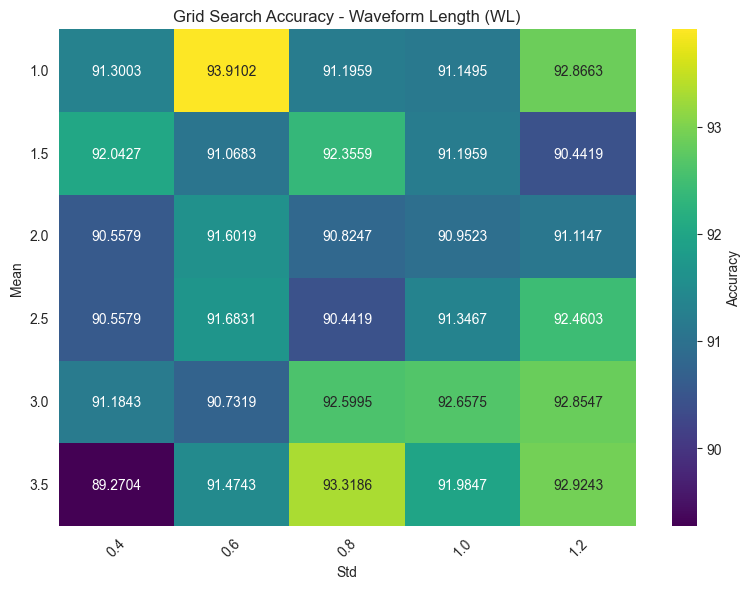

Best Accuracy: 93.9102 with mean=1, std=0.6


In [4]:
feature_idx = 2  # WL / 2 (mean) / 0.8 (std)
mean_list = [1, 1.5, 2, 2.5, 3, 3.5]
std_list = [0.4, 0.6, 0.8, 1, 1.2]

best_param, best_acc = get_best_param(mean_list, std_list, Normalization_TF, feature_idx, SUBJECT)
print(f"Best Accuracy: {best_acc:.4f} with mean={best_param[0]}, std={best_param[1]}")

# MAV

Dataset 1/6 - Session Exp_2025-06-27-v1/E9AD0E7DCC2B/
Dataset 2/6 - Session Exp_2025-06-27-v2/E9AD0E7DCC2B/
Dataset 3/6 - Session Exp_2025-07-09-v1/E9AD0E7DCC2B/
Dataset 4/6 - Session Exp_2025-07-09-v2/E9AD0E7DCC2B/
Dataset 5/6 - Session Exp_2025-07-10-v1/E9AD0E7DCC2B/
	 Training 4:  (34436, 4, 1) (34436,)
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 91.84%
Maximum validation accuracy : 95.58%
Accuracy of test dataset using model V0: 95.4598%
	 Accuracy on test dataset 5: 95.5763%
Dataset 6/6 - Session Exp_2025-07-10-v2/E9AD0E7DCC2B/
	 Accuracy on unseen dataset 6: 92.0311%
Dataset 1/6 - Session Exp_2025-06-27-v1/E9AD0E7DCC2B/
Dataset 2/6 - Session Exp_2025-06-27-v2/E9AD0E7DCC2B/
Dataset 3/6 - Session Exp_2025-07-09-v1/E9AD0E7DCC2B/
Dataset 4/6 - Session Exp_2025-07-09-v2/E9AD0E7DCC2B/
Dataset 5/6 - Session Exp_2025-07-10-v1/E9AD0E7DCC2B/
	 Training 4:  (34436, 4, 1) (34436,)
Start Training (total epochs: 50)...
Finish Training

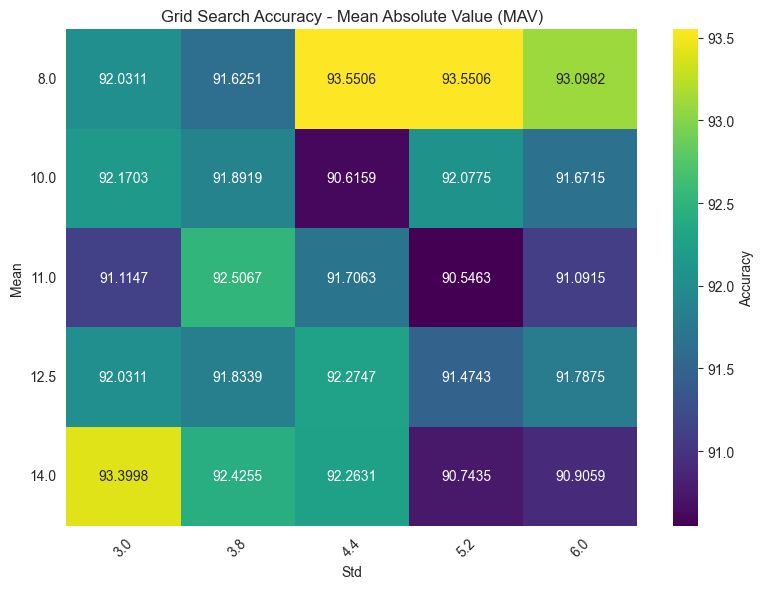

Best Accuracy: 93.5506 with mean=8.0, std=4.4


In [5]:
feature_idx = 4  # MAV / 11.0 (mean) / 4.43 (std)

mean_list = [8.0, 10.0, 11.0, 12.5, 14.0]
std_list = [3.0, 3.8, 4.4, 5.2, 6.0]

best_param, best_acc = get_best_param(mean_list, std_list, Normalization_TF, feature_idx, SUBJECT)
print(f"Best Accuracy: {best_acc:.4f} with mean={best_param[0]}, std={best_param[1]}")

# MS(Mean squared)

Dataset 1/6 - Session Exp_2025-06-27-v1/E9AD0E7DCC2B/
Dataset 2/6 - Session Exp_2025-06-27-v2/E9AD0E7DCC2B/
Dataset 3/6 - Session Exp_2025-07-09-v1/E9AD0E7DCC2B/
Dataset 4/6 - Session Exp_2025-07-09-v2/E9AD0E7DCC2B/
Dataset 5/6 - Session Exp_2025-07-10-v1/E9AD0E7DCC2B/
	 Training 4:  (34436, 4, 1) (34436,)
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 93.28%
Maximum validation accuracy : 94.41%
Accuracy of test dataset using model V0: 94.4121%
	 Accuracy on test dataset 5: 94.4121%
Dataset 6/6 - Session Exp_2025-07-10-v2/E9AD0E7DCC2B/
	 Accuracy on unseen dataset 6: 90.0244%
Dataset 1/6 - Session Exp_2025-06-27-v1/E9AD0E7DCC2B/
Dataset 2/6 - Session Exp_2025-06-27-v2/E9AD0E7DCC2B/
Dataset 3/6 - Session Exp_2025-07-09-v1/E9AD0E7DCC2B/
Dataset 4/6 - Session Exp_2025-07-09-v2/E9AD0E7DCC2B/
Dataset 5/6 - Session Exp_2025-07-10-v1/E9AD0E7DCC2B/
	 Training 4:  (34436, 4, 1) (34436,)
Start Training (total epochs: 50)...
Finish Training

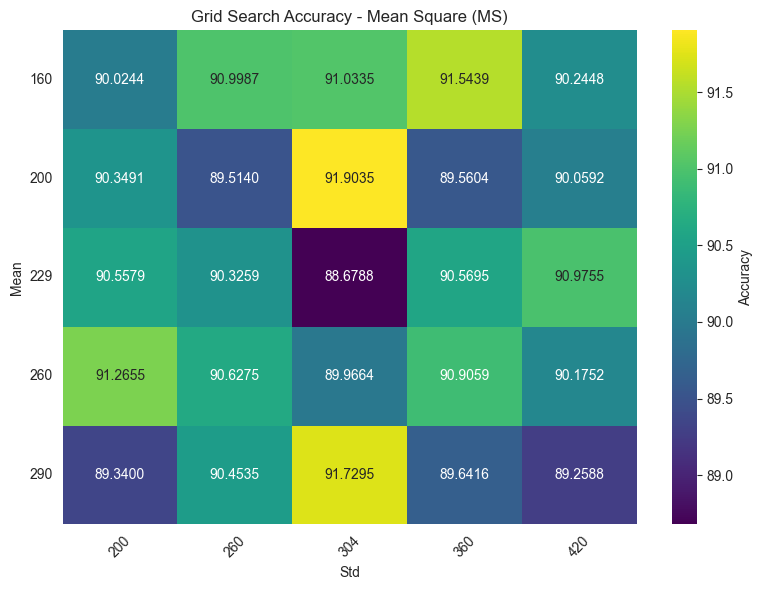

Best Accuracy: 91.9035 with mean=200, std=304


In [6]:
feature_idx = 5

mean_list = [160, 200, 229, 260, 290]
std_list  = [200, 260, 304, 360, 420]

best_param, best_acc = get_best_param(mean_list, std_list, Normalization_TF, feature_idx, SUBJECT)
print(f"Best Accuracy: {best_acc:.4f} with mean={best_param[0]}, std={best_param[1]}")

# Root Mean Squared (RMS)

Dataset 1/6 - Session Exp_2025-06-27-v1/E9AD0E7DCC2B/
Dataset 2/6 - Session Exp_2025-06-27-v2/E9AD0E7DCC2B/
Dataset 3/6 - Session Exp_2025-07-09-v1/E9AD0E7DCC2B/
Dataset 4/6 - Session Exp_2025-07-09-v2/E9AD0E7DCC2B/
Dataset 5/6 - Session Exp_2025-07-10-v1/E9AD0E7DCC2B/
	 Training 4:  (34436, 4, 1) (34436,)
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 89.23%
Maximum validation accuracy : 91.15%
Accuracy of test dataset using model V0: 90.1630%
	 Accuracy on test dataset 5: 91.1525%
Dataset 6/6 - Session Exp_2025-07-10-v2/E9AD0E7DCC2B/
	 Accuracy on unseen dataset 6: 89.3864%
Dataset 1/6 - Session Exp_2025-06-27-v1/E9AD0E7DCC2B/
Dataset 2/6 - Session Exp_2025-06-27-v2/E9AD0E7DCC2B/
Dataset 3/6 - Session Exp_2025-07-09-v1/E9AD0E7DCC2B/
Dataset 4/6 - Session Exp_2025-07-09-v2/E9AD0E7DCC2B/
Dataset 5/6 - Session Exp_2025-07-10-v1/E9AD0E7DCC2B/
	 Training 4:  (34436, 4, 1) (34436,)
Start Training (total epochs: 50)...
Finish Training

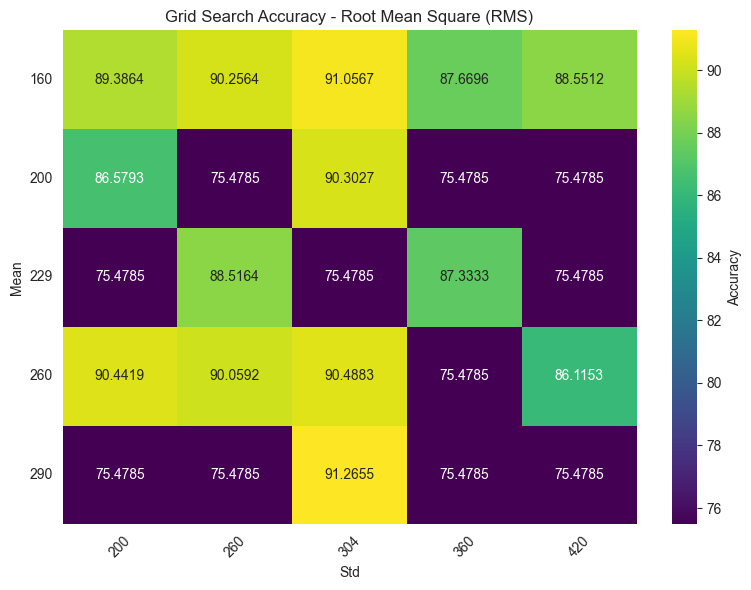

Best Accuracy: 91.2655 with mean=290, std=304


In [7]:
feature_idx = 6
mean_list_RMS = [10.0, 12.0, 13.8, 15.5, 17.0]
std_list_RMS  = [4.5, 5.5, 6.85, 8.0, 9.0]

best_param, best_acc = get_best_param(mean_list, std_list, Normalization_TF, feature_idx, SUBJECT)
print(f"Best Accuracy: {best_acc:.4f} with mean={best_param[0]}, std={best_param[1]}")

# Log Detector (LD)

Dataset 1/6 - Session Exp_2025-06-27-v1/E9AD0E7DCC2B/
Dataset 2/6 - Session Exp_2025-06-27-v2/E9AD0E7DCC2B/
Dataset 3/6 - Session Exp_2025-07-09-v1/E9AD0E7DCC2B/
Dataset 4/6 - Session Exp_2025-07-09-v2/E9AD0E7DCC2B/
Dataset 5/6 - Session Exp_2025-07-10-v1/E9AD0E7DCC2B/
	 Training 4:  (34436, 4, 1) (34436,)
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 86.19%
Maximum validation accuracy : 75.03%
Accuracy of test dataset using model V0: 75.0291%
	 Accuracy on test dataset 5: 75.0291%
Dataset 6/6 - Session Exp_2025-07-10-v2/E9AD0E7DCC2B/
	 Accuracy on unseen dataset 6: 75.4785%
Dataset 1/6 - Session Exp_2025-06-27-v1/E9AD0E7DCC2B/
Dataset 2/6 - Session Exp_2025-06-27-v2/E9AD0E7DCC2B/
Dataset 3/6 - Session Exp_2025-07-09-v1/E9AD0E7DCC2B/
Dataset 4/6 - Session Exp_2025-07-09-v2/E9AD0E7DCC2B/
Dataset 5/6 - Session Exp_2025-07-10-v1/E9AD0E7DCC2B/
	 Training 4:  (34436, 4, 1) (34436,)
Start Training (total epochs: 50)...
Finish Training

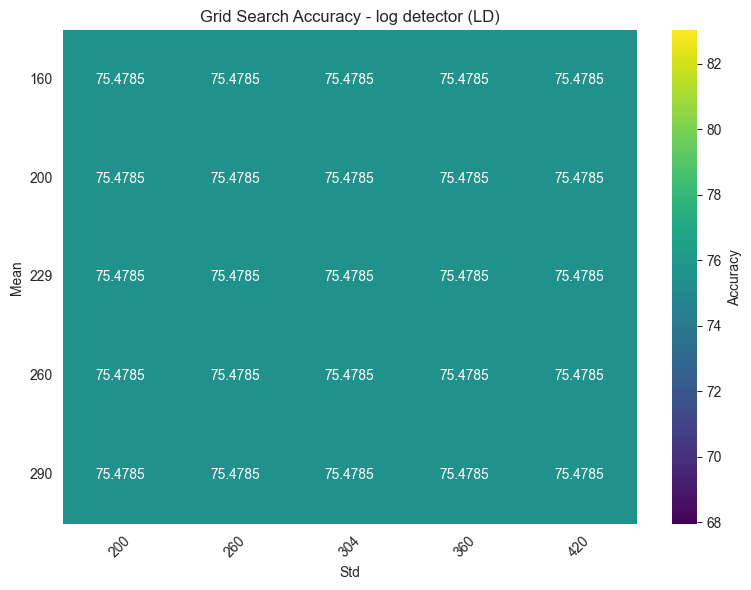

Best Accuracy: 75.4785 with mean=160, std=200


In [8]:
feature_idx = 8
mean_list_LogDet = [6.5, 8.0, 9.0, 10.0, 11.0]
std_list_LogDet  = [2.0, 2.5, 2.87, 3.3, 3.8]

best_param, best_acc = get_best_param(mean_list, std_list, Normalization_TF, feature_idx, SUBJECT)
print(f"Best Accuracy: {best_acc:.4f} with mean={best_param[0]}, std={best_param[1]}")

# DASDV (Difference Absolute Standard Deviation Value)

Dataset 1/6 - Session Exp_2025-06-27-v1/E9AD0E7DCC2B/
Dataset 2/6 - Session Exp_2025-06-27-v2/E9AD0E7DCC2B/
Dataset 3/6 - Session Exp_2025-07-09-v1/E9AD0E7DCC2B/
Dataset 4/6 - Session Exp_2025-07-09-v2/E9AD0E7DCC2B/
Dataset 5/6 - Session Exp_2025-07-10-v1/E9AD0E7DCC2B/
	 Training 4:  (34436, 4, 1) (34436,)
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 85.3%
Maximum validation accuracy : 74.8%
Accuracy of test dataset using model V0: 74.7963%
	 Accuracy on test dataset 5: 74.7963%
Dataset 6/6 - Session Exp_2025-07-10-v2/E9AD0E7DCC2B/
	 Accuracy on unseen dataset 6: 75.4785%
Dataset 1/6 - Session Exp_2025-06-27-v1/E9AD0E7DCC2B/
Dataset 2/6 - Session Exp_2025-06-27-v2/E9AD0E7DCC2B/
Dataset 3/6 - Session Exp_2025-07-09-v1/E9AD0E7DCC2B/
Dataset 4/6 - Session Exp_2025-07-09-v2/E9AD0E7DCC2B/
Dataset 5/6 - Session Exp_2025-07-10-v1/E9AD0E7DCC2B/
	 Training 4:  (34436, 4, 1) (34436,)
Start Training (total epochs: 50)...
Finish Training! 

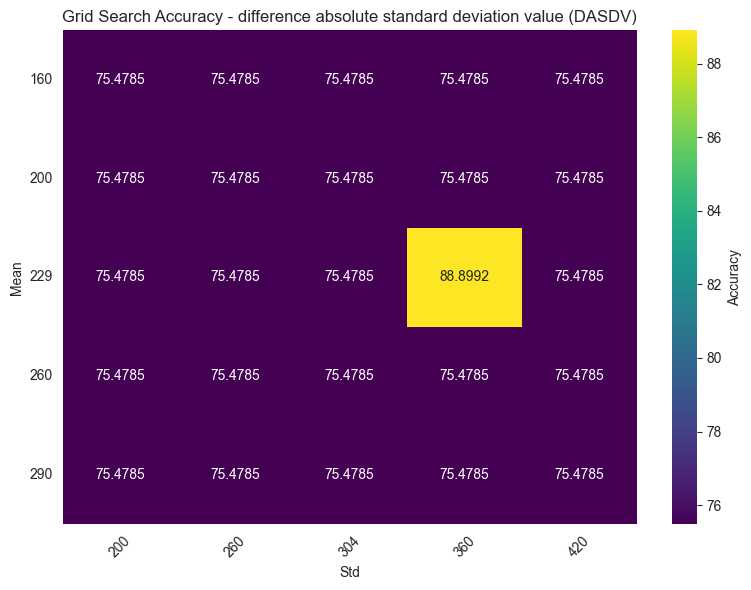

Best Accuracy: 88.8992 with mean=229, std=360


In [9]:
feature_idx = 9
mean_list_DASDV = [2.2, 2.6, 3.0, 3.4, 3.8]
std_list_DASDV  = [0.6, 0.75, 0.87, 1.0, 1.1]

best_param, best_acc = get_best_param(mean_list, std_list, Normalization_TF, feature_idx, SUBJECT)
print(f"Best Accuracy: {best_acc:.4f} with mean={best_param[0]}, std={best_param[1]}")

# MFL (Maximum Fractal Length)

Dataset 1/6 - Session Exp_2025-06-27-v1/E9AD0E7DCC2B/
Dataset 2/6 - Session Exp_2025-06-27-v2/E9AD0E7DCC2B/
Dataset 3/6 - Session Exp_2025-07-09-v1/E9AD0E7DCC2B/
Dataset 4/6 - Session Exp_2025-07-09-v2/E9AD0E7DCC2B/
Dataset 5/6 - Session Exp_2025-07-10-v1/E9AD0E7DCC2B/
	 Training 4:  (34436, 4, 1) (34436,)
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 79.22%
Maximum validation accuracy : 74.33%
Accuracy of test dataset using model V0: 74.3306%
	 Accuracy on test dataset 5: 74.3306%
Dataset 6/6 - Session Exp_2025-07-10-v2/E9AD0E7DCC2B/
	 Accuracy on unseen dataset 6: 75.4785%
Dataset 1/6 - Session Exp_2025-06-27-v1/E9AD0E7DCC2B/
Dataset 2/6 - Session Exp_2025-06-27-v2/E9AD0E7DCC2B/
Dataset 3/6 - Session Exp_2025-07-09-v1/E9AD0E7DCC2B/
Dataset 4/6 - Session Exp_2025-07-09-v2/E9AD0E7DCC2B/
Dataset 5/6 - Session Exp_2025-07-10-v1/E9AD0E7DCC2B/
	 Training 4:  (34436, 4, 1) (34436,)
Start Training (total epochs: 50)...
Finish Training

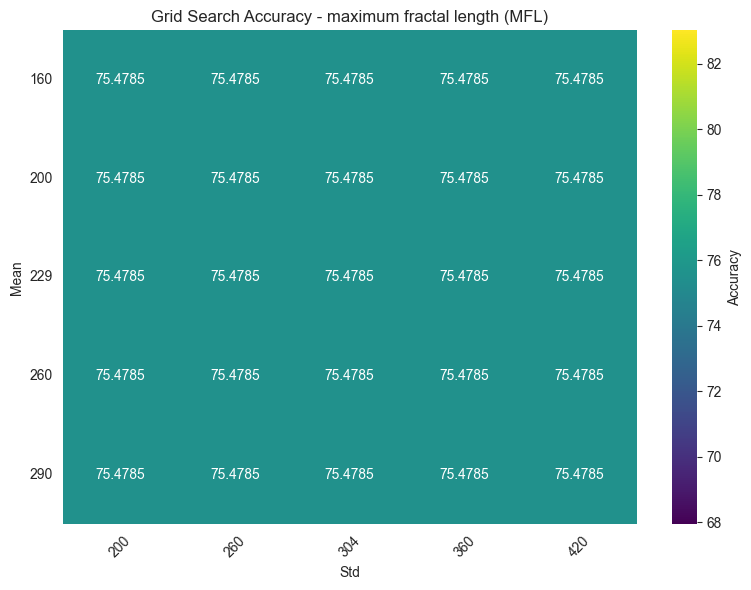

Best Accuracy: 75.4785 with mean=160, std=200


In [10]:
feature_idx = 10
mean_list_MFL = [1.0, 1.3, 1.5, 1.7, 2.0]
std_list_MFL  = [0.12, 0.17, 0.21, 0.25, 0.30]

best_param, best_acc = get_best_param(mean_list, std_list, Normalization_TF, feature_idx, SUBJECT)
print(f"Best Accuracy: {best_acc:.4f} with mean={best_param[0]}, std={best_param[1]}")

# WMS

Dataset 1/6 - Session Exp_2025-06-27-v1/E9AD0E7DCC2B/
Dataset 2/6 - Session Exp_2025-06-27-v2/E9AD0E7DCC2B/
Dataset 3/6 - Session Exp_2025-07-09-v1/E9AD0E7DCC2B/
Dataset 4/6 - Session Exp_2025-07-09-v2/E9AD0E7DCC2B/
Dataset 5/6 - Session Exp_2025-07-10-v1/E9AD0E7DCC2B/
	 Training 4:  (34436, 4, 1) (34436,)
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 85.57%
Maximum validation accuracy : 74.39%
Accuracy of test dataset using model V0: 74.3888%
	 Accuracy on test dataset 5: 74.3888%
Dataset 6/6 - Session Exp_2025-07-10-v2/E9AD0E7DCC2B/
	 Accuracy on unseen dataset 6: 75.4785%
Dataset 1/6 - Session Exp_2025-06-27-v1/E9AD0E7DCC2B/
Dataset 2/6 - Session Exp_2025-06-27-v2/E9AD0E7DCC2B/
Dataset 3/6 - Session Exp_2025-07-09-v1/E9AD0E7DCC2B/
Dataset 4/6 - Session Exp_2025-07-09-v2/E9AD0E7DCC2B/
Dataset 5/6 - Session Exp_2025-07-10-v1/E9AD0E7DCC2B/
	 Training 4:  (34436, 4, 1) (34436,)
Start Training (total epochs: 50)...
Finish Training

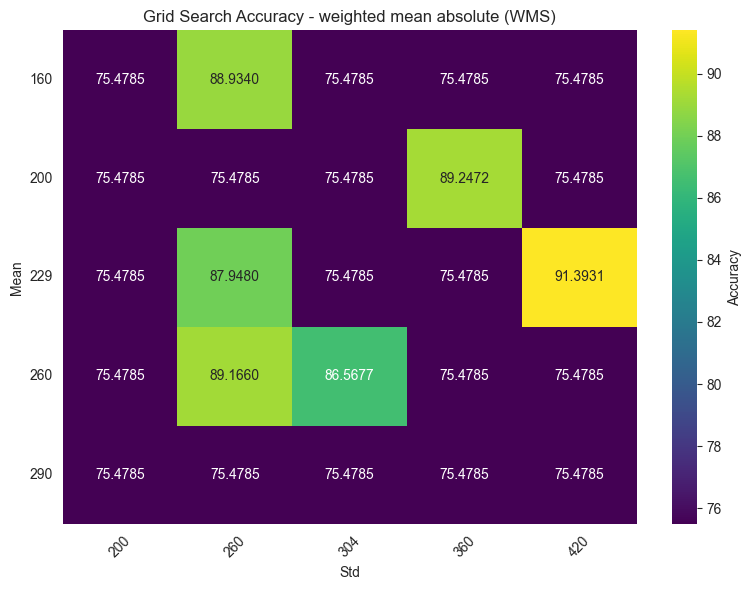

Best Accuracy: 91.3931 with mean=229, std=420


In [11]:
feature_idx = 13
mean_list_WMS = [2.0, 2.4, 2.8, 3.2, 3.6]
std_list_WMS  = [0.8, 1.0, 1.12, 1.3, 1.5]

best_param, best_acc = get_best_param(mean_list, std_list, Normalization_TF, feature_idx, SUBJECT)
print(f"Best Accuracy: {best_acc:.4f} with mean={best_param[0]}, std={best_param[1]}")